<a href="https://colab.research.google.com/github/abhiram-ummadishetty/Fraud-Detection-in-Credit-Card/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [33]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv', sep = ',')
data.head(25)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227000e+04,4.227000e+04,42270.000000,42270.0
mean,7.171087,1.490108e+05,7.727734e+05,7.874065e+05,8.450982e+05,1.158405e+06,0.002224,0.0
std,2.118037,3.145005e+05,2.284003e+06,2.321941e+06,2.466743e+06,2.960508e+06,0.047105,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.337969e+05,8.013660e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000,0.0


In [9]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [11]:
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


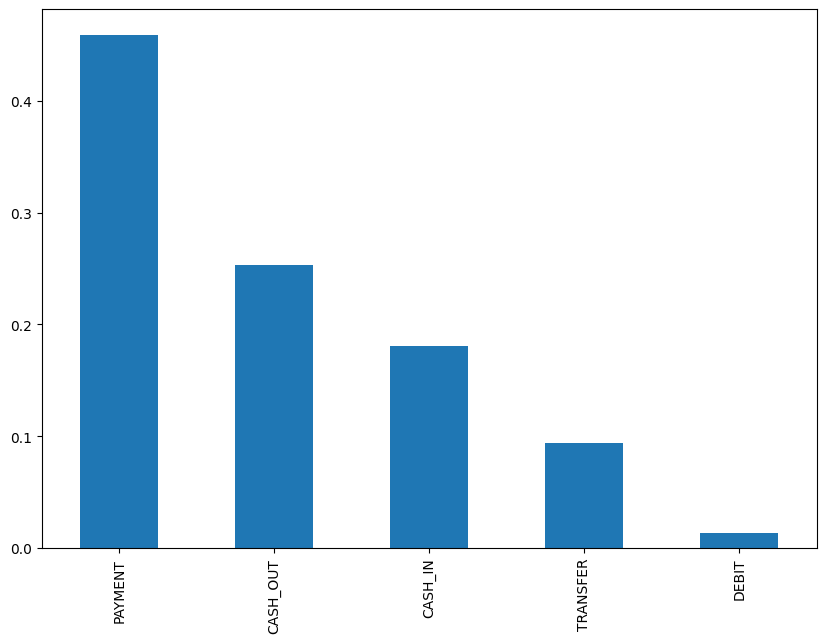

In [12]:
fig = plt.figure(figsize =(10, 7))
data['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [13]:
print("No Frauds Percentage:",data['isFraud'].value_counts()[0]/len(data['isFraud'])*100)
print("Frauds Percentage:",data['isFraud'].value_counts()[1]/len(data['isFraud'])*100)

No Frauds Percentage: 99.77525963426463
Frauds Percentage: 0.22237467767500177


In [14]:
data.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1, inplace = True)

<ipython-input-34-4038ff560576>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlationdata.corr(), annot = True)


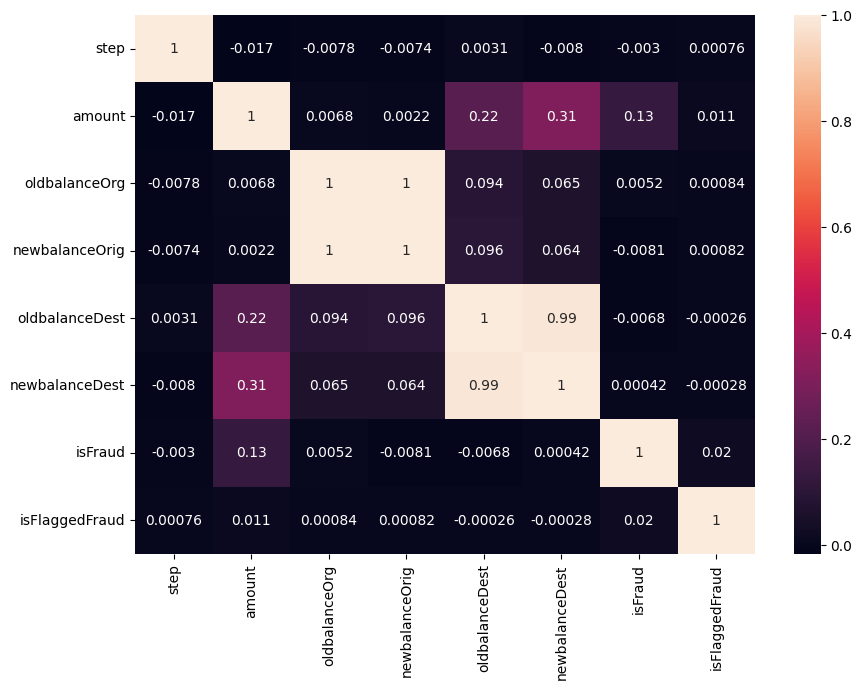

In [34]:
correlationdata = data.copy()
correlationdata.drop(['type'], axis = 1, inplace = True)

fig = plt.figure(figsize =(10, 7))
sns.heatmap(correlationdata.corr(), annot = True)
plt.show()

In [16]:
dataf = pd.get_dummies(data = data,columns = ['type'], drop_first = True)
dataf.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [17]:
nonfraud = dataf[dataf['isFraud']==0]
fraud = dataf[dataf['isFraud']==1]
nonfraud = nonfraud.sample(n=8300, random_state = 1)

frauddata = pd.merge(fraud,nonfraud, how = "outer")

In [18]:
x = frauddata.drop('isFraud', axis = 1)
y = frauddata['isFraud']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3, random_state = 42)

# models



In [20]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

In [21]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

In [22]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [23]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred_gb = gb.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression classification report: \n\n"  ,classification_report(y_test,y_pred))

Logistic Regression classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5811
         1.0       0.34      0.83      0.48        65

    accuracy                           0.98      5876
   macro avg       0.67      0.91      0.73      5876
weighted avg       0.99      0.98      0.98      5876



In [25]:
print("Decision Tree classification report: \n\n"  ,classification_report(y_test,y_pred_dt))

Decision Tree classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5811
         1.0       0.69      0.62      0.65        65

    accuracy                           0.99      5876
   macro avg       0.84      0.81      0.82      5876
weighted avg       0.99      0.99      0.99      5876



In [26]:
print("Random Forest classification report: \n\n"  ,classification_report(y_test,y_pred_rf))

Random Forest classification report: 

               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5811
         1.0       1.00      0.45      0.62        65

    accuracy                           0.99      5876
   macro avg       1.00      0.72      0.81      5876
weighted avg       0.99      0.99      0.99      5876



In [27]:
print("Gradient Boosting classification report: \n\n"  ,classification_report(y_test,y_pred_gb))


Gradient Boosting classification report: 

               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5811
         1.0       0.97      0.48      0.64        65

    accuracy                           0.99      5876
   macro avg       0.98      0.74      0.82      5876
weighted avg       0.99      0.99      0.99      5876



In [31]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test,y_pred))
print("Decision Tree Accuracy Score: ", accuracy_score(y_test,y_pred_dt))
print("Random Forest accuracy score: ", accuracy_score(y_test,y_pred_rf))
print("Gradient Boosting accuracy score: ", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy Score: 0.9800884955752213
Decision Tree Accuracy Score:  0.9926820966643976
Random Forest accuracy score:  0.9938733832539143
Gradient Boosting accuracy score:  0.9940435670524166


In [29]:
comparision_array = [accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test, y_pred_gb)]
print(comparision_array)

[0.9800884955752213, 0.9926820966643976, 0.9938733832539143, 0.9940435670524166]


In [30]:
max(comparision_array)

0.9940435670524166